In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

## Introduction

The American Ultimate Disc League, or AUDL, is a professional ultimate disc league with teams across the country, and over 600 registered players. We have collected publicly available data with statistics on the performance of individual players and teams throughout the 2019 season and are analyzing it to identify patterns in how players impact their teams and different styles of play that those players might adopt.

## Importing data

Our data is parsed from three sources. We collected player stats, team stats, and team rosters, all for the 2019 AUDL season.

### Player Stats

These are parsed from <https://theaudl.com/stats/player-season>, they consist of players' full-season stats.

In [5]:
player_stats = pd.read_csv("../data/player_stats_data.csv", index_col=0)
player_stats.head()

,PLAYER,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Quentin Bonnaud,12,83,6.92,15,1.25,14,1.17,101,8.42,208,17.33,96.3,284,23.67
1,Rowan McDonnell,13,67,5.15,51,3.92,5,0.38,92,7.08,408,31.38,93.8,359,27.62
2,Ben Jagt,15,67,4.47,64,4.27,14,0.93,111,7.40,287,19.13,91.4,379,25.27
3,Max Sheppard,14,61,4.36,68,4.86,9,0.64,103,7.36,295,21.07,91.0,337,24.07
4,Eli Jaime,10,52,5.20,12,1.20,4,0.40,61,6.10,101,10.10,95.3,211,21.10


### Team Stats

These are each team's stats for the full season, parsed from <https://theaudl.com/stats/team>.

In [6]:
team_stats = pd.read_csv("../data/team_stats.csv", index_col=0)
team_stats.head()

,Team,G,W,L,T,PTS,PPG,PA,PAPG,OEFF,DEFF,+ / -,+/- PG,BLK,BPG,CMP,CPG,CMP %,TO,TPG
0,New York Empire,15,15,0,0,334,22.27,282,18.80,0.48,-0.42,588,39.20,150,10.00,"3,547",236.47,94.7,230,15.33
1,San Diego Growlers,14,11,3,0,328,23.43,292,20.86,0.46,-0.42,581,41.50,157,11.21,"3,404",243.14,94.8,228,16.29
2,Raleigh Flyers,13,10,3,0,293,22.54,255,19.62,0.39,-0.36,514,39.54,124,9.54,"3,197",245.92,95.0,192,14.77
3,Dallas Roughnecks,15,10,5,0,320,21.33,300,20.00,0.32,-0.41,550,36.67,202,13.47,"3,640",242.67,93.7,290,19.33
4,Pittsburgh Thunderbirds,14,9,5,0,298,21.29,270,19.29,0.33,-0.41,487,34.79,141,10.07,"3,551",253.64,94.5,249,17.79


### Team Rosters

These associate players with teams, and are parsed from individual team pages at <https://theaudl.com/league/teams>.

In [7]:
rosters = pd.read_csv("../data/player_info.csv", index_col=0)
rosters.head()

,Team,Player
0,hustle,Daniel Sperling
1,hustle,Will Lindquist
2,hustle,Austin Taylor
3,hustle,Player Pierce
4,hustle,Michael Fairley


In [8]:
rosters = pd.read_csv("../data/rosters.csv", index_col=0)
rosters.head()

,Player,Team
0,Sam Batson,hustle
1,Sun Choi,hustle
2,Karl Ekwurtzel,hustle
3,Brett Hulsmeyer,hustle
4,Elijah Jaime,hustle


## Data Processing

We want to combine this data to make it easier to analyze. The first thing we can do is to combine the player statistics and the rosters, so that teams are associated with players. We perform an inner merge, so that players who are not associated with a roster are dropped from the table.

## Data description

*What are the observations (rows) and the attributes (columns)?*

Each observation represents data collected about a given player in the 2019 AUDL season. The following features are recorded for each player.

Object fields:
- Player: The name of the player as registered with AUDL (string)
- Team: The roster a player is on (string)

Numeric fields:
- G: Games played
- GLS: Goals scored
- GPG: Goals per game
- AST: Assists
- APG: Assists per game
- BLK: Blocks
- BPG: Blocks per game
- +/-: Plus/minus, the player's points won - points lost
- +/- PG: Plus/minus per game
- CMP: Completions (thrown passes that were caught)
- CPG: Completions per game
- CMP %: Completion percentage
- PP: Points played
- PPG: Points played per game

Team Data:
- G: Games played
- W: Wins
- L: Losses
- T: Ties
- PTS: Points scored
- PPG: Points per game
- PA: Points scored against
- PAPG: Points scored against per game
- OEFF: Offesive efficiency
- DEFF: Defensive efficiency
- +/-: Plus minus
- +/-PG: Plus minus per game
- BLK: Blocks
- BPG: Blocks per game
- CMP: Completions 
- CPG: Completions per game
- CMP%: Completions percent
- TO: Turnovers
- TPG: Turnovers per game

*Why was this dataset created?*

This dataset was created to document the performance of teams and players in the AUDL. The data could be used by players and teams, to evaluate their opponents' and their own strengths and weaknesses, as well as by spectators, to keep track of how their teams were performing throughout the season.

*Who funded the creation of the dataset?*

The collection and creation of this data was funded by the American Ultimate Disc League.

*What processes might have influenced what data was observed and recorded and what was not?*

To the best of our knowledge, all data was recorded for all games played in the 2019 season. However, it's possible that data may not have been collected in full for some poorly attended games, but this is not documented.

*What preprocessing was done, and how did the data come to be in the form that you are using?*

This data required minimal preprocessing, because the AUDL presented it in a well-processed and documented format. They have calculated per-game evaluations of some of the statistics. Our preprocessing mostly consists of joining the different datasets together.

*If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?*

The subjects of this data collection are AUDL players, who were aware of this data collection because it was made publicly available and collected with their consent. They likely expected the data to be used for the purposes described above.

Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 



In [9]:
data = rosters.merge(player_stats, left_on='Player', right_on='PLAYER')
data.head()

,Player,Team,PLAYER,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Sam Batson,hustle,Sam Batson,8,0,0.00,4,0.50,3,0.38,4,0.50,24,3.00,88.9,67,8.38
1,Sun Choi,hustle,Sun Choi,10,2,0.20,10,1.00,3,0.30,6,0.60,90,9.00,90.9,132,13.20
2,Karl Ekwurtzel,hustle,Karl Ekwurtzel,9,4,0.44,1,0.11,4,0.44,2,0.22,44,4.89,86.3,121,13.44
3,Brett Hulsmeyer,hustle,Brett Hulsmeyer,10,8,0.80,1,0.10,12,1.20,18,1.80,38,3.80,92.7,179,17.90
4,Matthew Knowles,hustle,Matthew Knowles,7,0,0.00,13,1.86,0,0.00,7,1.00,117,16.71,95.1,108,15.43


## Exploratory Data Analysis

Here we'll examine some of the features of the dataset, to better understand how they relate

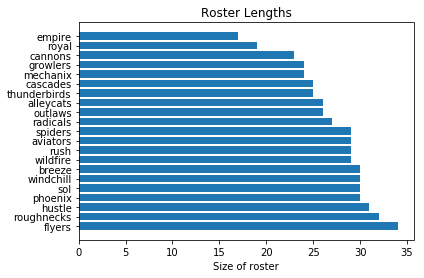

In [10]:
# Roster counts
count = data.Team.value_counts()
plt.barh(count.index, count)
plt.xlabel("Size of roster")
plt.title("Roster Lengths")
plt.show()

It looks like the Glory lost a bunch of players in the merge--they're not included in our seasonal statistics. A quick scan through their [roster](https://theaudl.com/glory/players) page confirms this--only one of their players has recorded stats for 2019, or any year for that matter. We'll have to accomodate this in our modeling.

In [11]:
# sns.pairplot(data, diag_kind='kde')
# plt.show()

In [12]:
per_game_features = ["GPG", "APG", "BPG", "+/- PG", "CPG", "CMP %", "PPG"]
pg_data = data[per_game_features]
pg_data.head()

,GPG,APG,BPG,+/- PG,CPG,CMP %,PPG
0,0.00,0.50,0.38,0.50,3.00,88.9,8.38
1,0.20,1.00,0.30,0.60,9.00,90.9,13.20
2,0.44,0.11,0.44,0.22,4.89,86.3,13.44
3,0.80,0.10,1.20,1.80,3.80,92.7,17.90
4,0.00,1.86,0.00,1.00,16.71,95.1,15.43


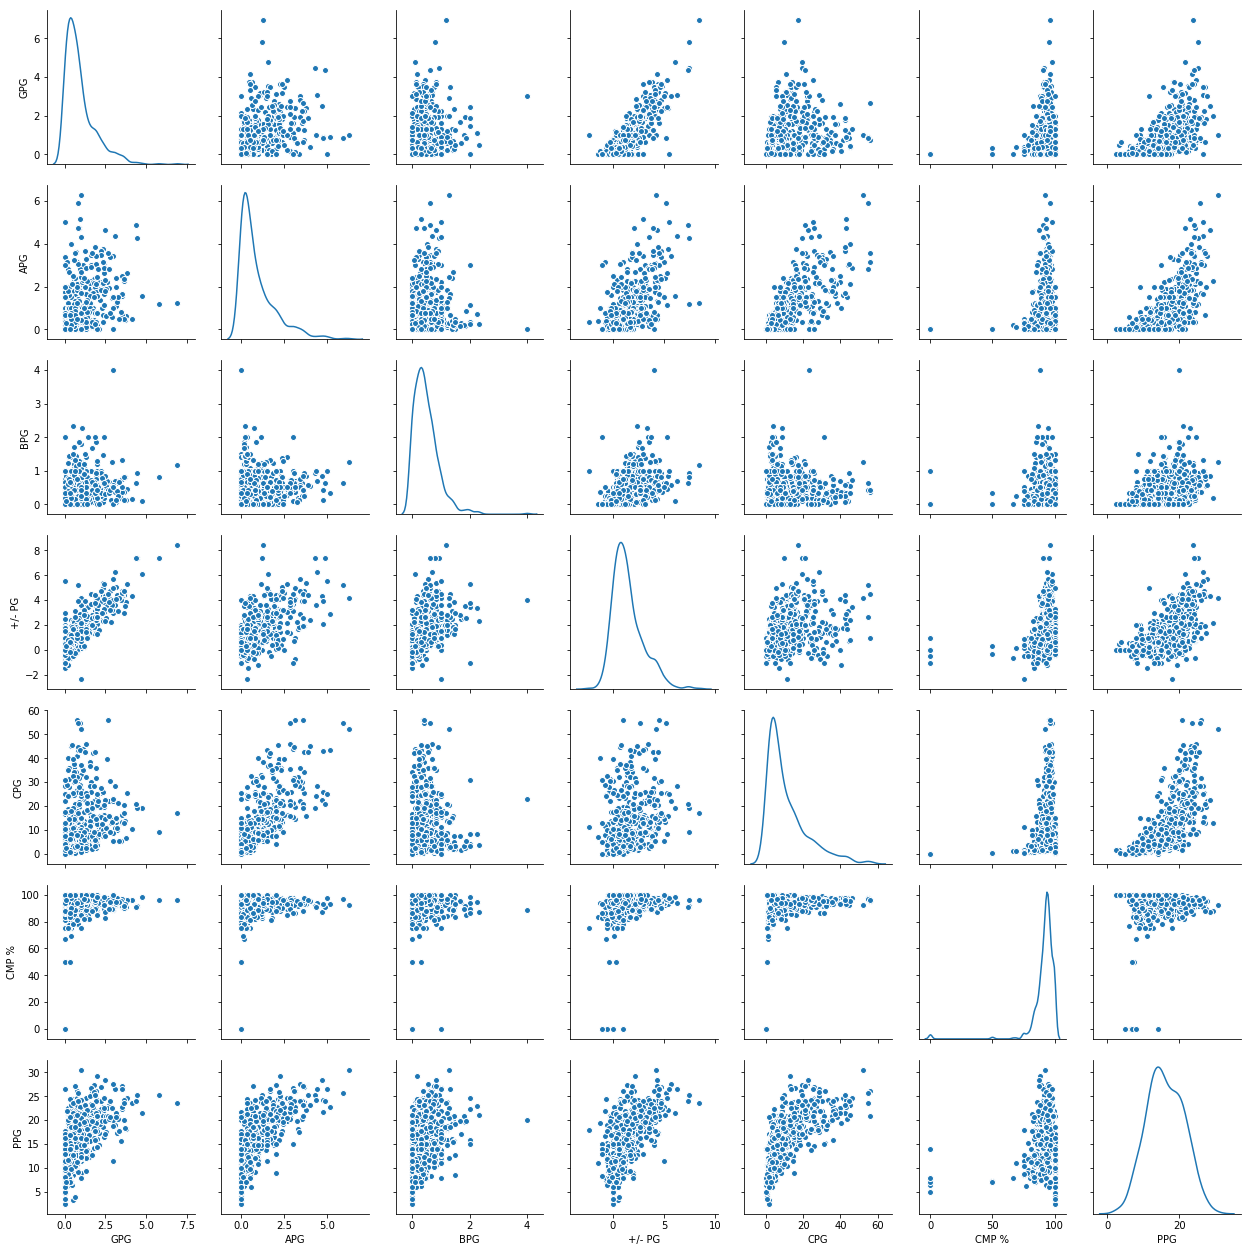

In [13]:
sns.pairplot(pg_data, diag_kind='kde')
plt.show()

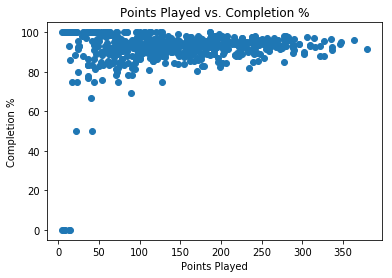

In [20]:
plt.scatter(data["PP"], data['CMP %'])
plt.xlabel("Points Played")
plt.ylabel("Completion %")
plt.xticks(range(0,400,50))
plt.title("Points Played vs. Completion %")
plt.show()

Looking at the scatterplot, it is evident that the number of points played has a slightly negative correlation to the number of points played. Looking at frisbee, it is expected that in the AUDL, players will have a high completion percent as that is their primary task. It isn't surprising to see the completion % decline with the number of points played because as the player plays more points, they will have the disc thrown to them more often and that gives a larger chance for them to not complete the pass. You can also see that the number of points played averages to about the average of the cluster of % between 0 and 200 points played. The same goes for when players play less points, their completion % is effected more if they drop the disc once in 200 points versus once in 300 points.

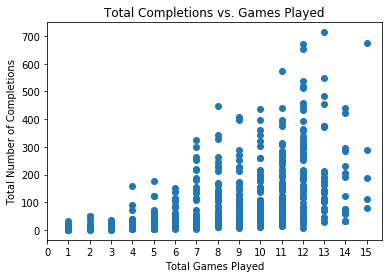

In [15]:
plt.scatter(data['G'], data['CMP'])
plt.ylabel("Total Number of Completions")
plt.xlabel("Total Games Played")
plt.xticks(range(0,16))
plt.title("Total Completions vs. Games Played")
plt.show()

When looking at the scatter plot, it seems there is an exponential growth for the number of games played and the total number of completions. One interesting point is that despite the number of games played, there are still lots of players that have completion totals less than zero. This may be due to the defensive line exhausting the offensive line and not getting the disc back. It is strange to see that after the 13th game, there are players that hvave less completions than those who have played less games. This could be to recievers who are vital to the team but do not necessarily get the disc thrown to them that offen. High completions are for the key offensive players who are constantly making the biggest playes on the team and can assume scoring a lot of points. It can also be assumed that the high completion rate is handlers getting the disc thrown back to them so they have the ability to throw the disc to anyone on the field.